# 1.Univarient Analysis

In [ ]:
Univariate  is a term commonly used in statistics to describe a type of data which consists of observsations on only  a single 
characteristic or attribute.

##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re 
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Import from a  clean Dataset 

In [2]:
df4=pd.read_csv(r"C:\Users\user\Downloads\Water_purifier3.csv") 
df4

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,ProductName.1,Capacity (L/hr)
0,Pureit Max,13999,22500,4.4,37.0,Free delivery,Electrical & Storage,Pureit Max,24
1,Aqua Fresh,4199,16500,4.0,74.0,Free delivery,Electrical & Storage,Aqua Fresh,12
2,MarQ by,3999,16500,4.0,75.0,Free delivery,Electrical & Storage,MarQ by,12
3,Kinsco Aqua,4299,20000,4.1,78.0,Free delivery,Electrical & Storage,Kinsco Aqua,15
4,KENT Ace,13999,19500,4.4,28.0,Free delivery,Electrical & Storage,KENT Ace,5
...,...,...,...,...,...,...,...,...,...
402,Keel Mineral,3983,16500,3.2,75.0,Free delivery,Electrical & Storage,Keel Mineral,20
403,Aquaguard RO+UV+UF+MTDS,14800,21990,3.3,32.0,Free delivery,Electrical & Storage,Aquaguard RO+UV+UF+MTDS,5
404,AquaActive Hot,11768,34000,4.3,65.0,Free delivery,Electrical & Storage,AquaActive Hot,12
405,AQUA DOVE,4769,12500,4.3,61.0,Free delivery,Electrical & Storage,AQUA DOVE,12


In [3]:
df4

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,ProductName.1,Capacity (L/hr)
0,Pureit Max,13999,22500,4.4,37.0,Free delivery,Electrical & Storage,Pureit Max,24
1,Aqua Fresh,4199,16500,4.0,74.0,Free delivery,Electrical & Storage,Aqua Fresh,12
2,MarQ by,3999,16500,4.0,75.0,Free delivery,Electrical & Storage,MarQ by,12
3,Kinsco Aqua,4299,20000,4.1,78.0,Free delivery,Electrical & Storage,Kinsco Aqua,15
4,KENT Ace,13999,19500,4.4,28.0,Free delivery,Electrical & Storage,KENT Ace,5
...,...,...,...,...,...,...,...,...,...
402,Keel Mineral,3983,16500,3.2,75.0,Free delivery,Electrical & Storage,Keel Mineral,20
403,Aquaguard RO+UV+UF+MTDS,14800,21990,3.3,32.0,Free delivery,Electrical & Storage,Aquaguard RO+UV+UF+MTDS,5
404,AquaActive Hot,11768,34000,4.3,65.0,Free delivery,Electrical & Storage,AquaActive Hot,12
405,AQUA DOVE,4769,12500,4.3,61.0,Free delivery,Electrical & Storage,AQUA DOVE,12


In [5]:
##df4.drop(columns='Unnamed: 0',inplace=True)
##df4

In [6]:
df4.dtypes

ProductName          object
Price(₹)              int64
Original_cost(₹)      int64
Rating              float64
Discount(%)         float64
Delivery_offers      object
Type_models          object
ProductName.1        object
Capacity (L/hr)       int64
dtype: object

In [7]:
df4.shape

(407, 9)

In [8]:
df4.duplicated().sum()

0

## Exploratory Data Analysis

In [9]:
df4.head(10)

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,ProductName.1,Capacity (L/hr)
0,Pureit Max,13999,22500,4.4,37.0,Free delivery,Electrical & Storage,Pureit Max,24
1,Aqua Fresh,4199,16500,4.0,74.0,Free delivery,Electrical & Storage,Aqua Fresh,12
2,MarQ by,3999,16500,4.0,75.0,Free delivery,Electrical & Storage,MarQ by,12
3,Kinsco Aqua,4299,20000,4.1,78.0,Free delivery,Electrical & Storage,Kinsco Aqua,15
4,KENT Ace,13999,19500,4.4,28.0,Free delivery,Electrical & Storage,KENT Ace,5
5,Pureit Advanced,7599,11399,4.5,33.0,Free delivery,Electrical & Storage,Pureit Advanced,12
6,Aqua Frisch,4299,20000,4.0,78.0,Free delivery,Electrical & Storage,Aqua Frisch,15
7,Aqua Fresh,3999,16500,3.9,75.0,Free delivery,Electrical & Storage,Aqua Fresh,20
8,Aqua Fresh,3999,13999,4.0,71.0,Free delivery,Electrical & Storage,Aqua Fresh,12
9,Pureit by,21990,27990,4.4,21.0,Free delivery,Electrical & Storage,Pureit by,5


# Countplot

In [10]:
df4["Type_models"].value_counts()

Electrical & Storage                346
Non - Electrical & Storage           32
Electrical & Non - Storage           25
Non - Electrical & Non - Storage      4
Name: Type_models, dtype: int64

In [11]:
df4['Type_models'].nunique()

4

In [12]:
df4['Type_models'].unique()

array(['Electrical & Storage', 'Non - Electrical & Storage',
       'Electrical & Non - Storage', 'Non - Electrical & Non - Storage'],
      dtype=object)

In [13]:
df4['ProductName'].value_counts()

Aqua Fresh                 39
MarQ by                    14
Grand plus                 13
AO Smith                    9
Eureka Forbes               9
                           ..
Zero B                      1
Remino                      1
Keel EPIC                   1
hul purite                  1
Aquaguard RO+UV+UF+MTDS     1
Name: ProductName, Length: 225, dtype: int64

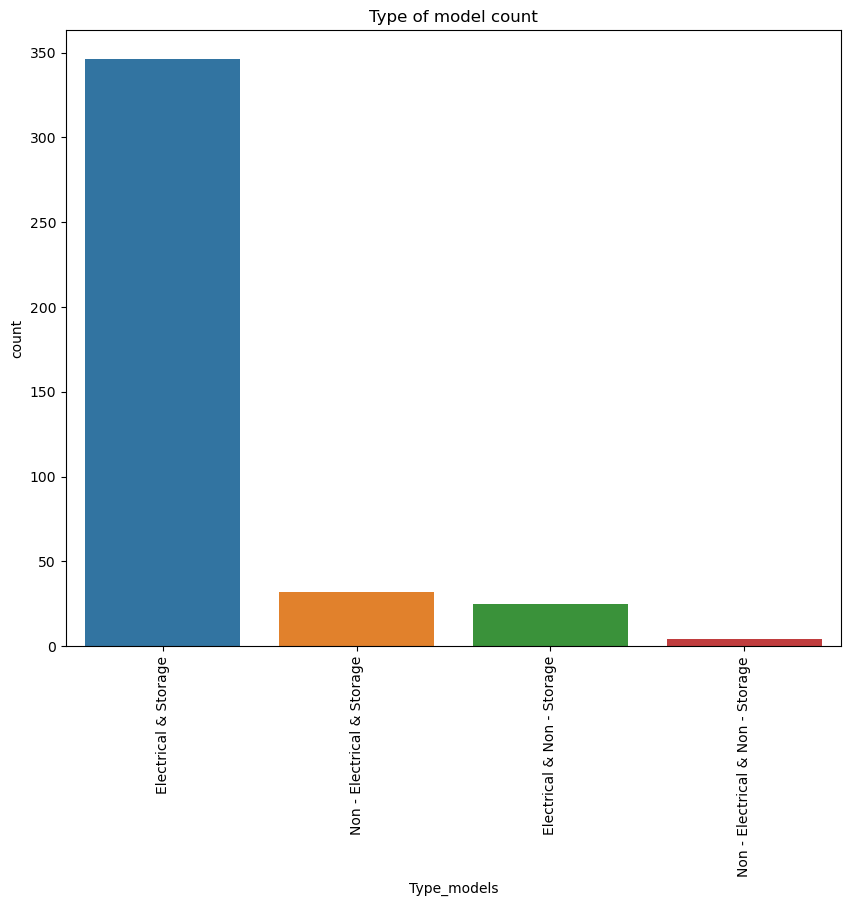

In [14]:
plt.figure(figsize=[10,8])
plt.title('Type of model count')
sns.countplot(x='Type_models', data=df4)
plt.ylabel('count')
plt.xlabel('Type_models')
plt.xticks(rotation = 90)
plt.show()
#sns.countplot(x="ProductName",data=df4)

# Observations
- Electrical & Storage purifiers having more then 600 nos
- Non-Electrical &  Non-Storage purifiers having less items upto 10 nos 

In [15]:
c=df4[df4["Rating"]>4.3] 

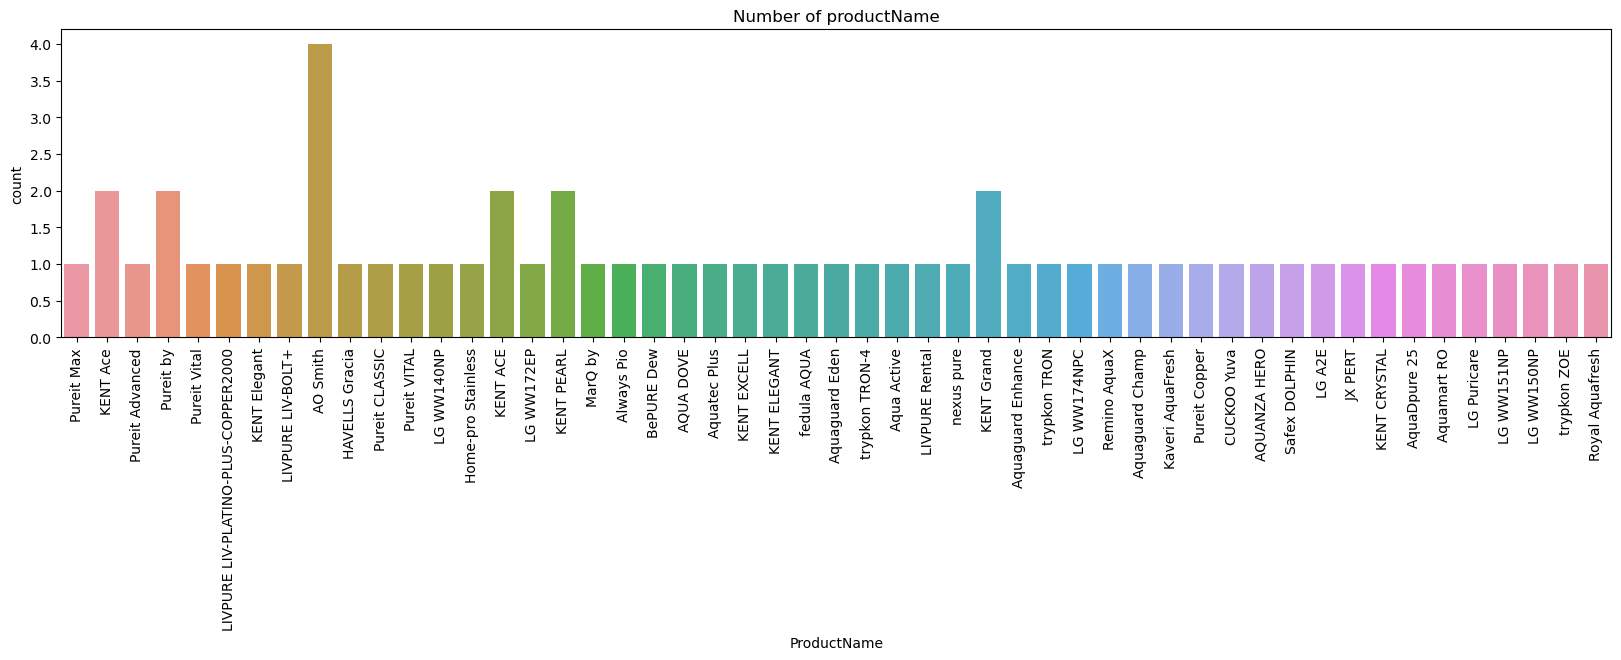

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(x='ProductName', data=pd.DataFrame(c))
plt.title('Number of productName')
plt.ylabel('count')
plt.xlabel('ProductName')
plt.xticks(rotation = 90)
plt.show()

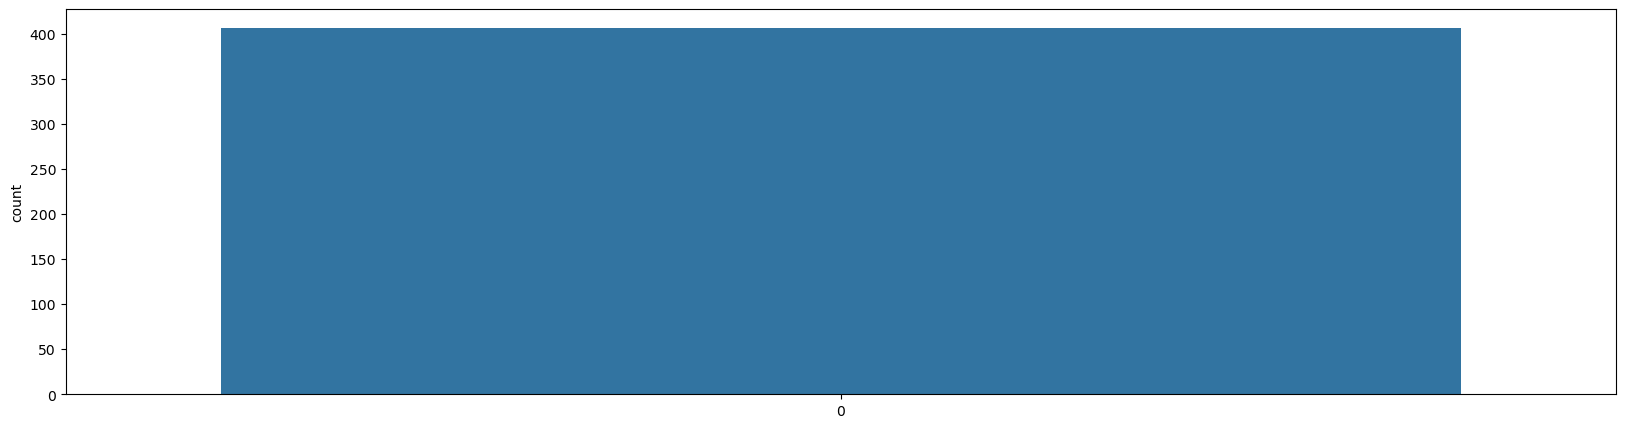

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(df4['Rating'])
plt.show()

# Observations
- At rating 4.3 there was high ratings more then 300
- At rating 2.5 there was less ratings upto 5.


## Pie Chart

# categorical

In [18]:
df4["Type_models"].value_counts()

Electrical & Storage                346
Non - Electrical & Storage           32
Electrical & Non - Storage           25
Non - Electrical & Non - Storage      4
Name: Type_models, dtype: int64

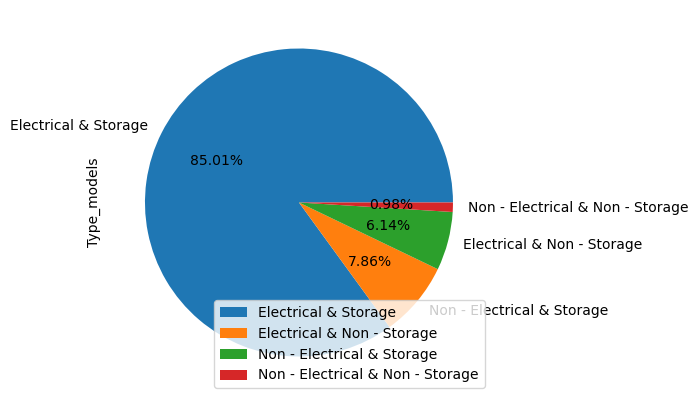

In [19]:
plt.figure(figsize=(5,5))
value=[638,44,28,7]
df4["Type_models"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Electrical & Storage','Electrical & Non - Storage','Non - Electrical & Storage','Non - Electrical & Non - Storage',],loc=4)
plt.show()

# Observations 
- Electrical & Storage purifiers are highest upto 88.98%
- Non-Electrical & Non-Storage purifiers are lowest upto 0.98%

In [20]:
df4["Delivery_offers"].value_counts()

Free delivery       377
Delivery charges     30
Name: Delivery_offers, dtype: int64

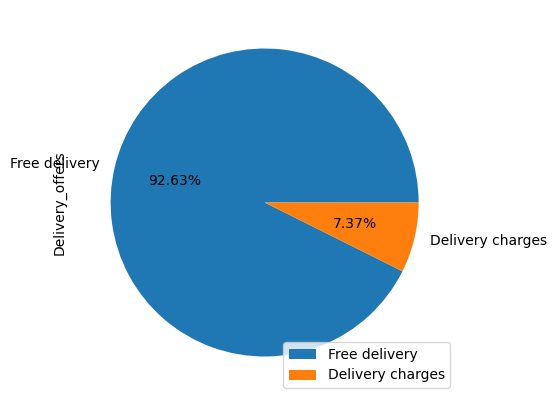

In [21]:
plt.figure(figsize=(5,5))
value=[595,122]
df4["Delivery_offers"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Free delivery','Delivery charges',],loc=4)
plt.show()

# Observatiions
- Free delivery items are more upto 82.98%
- Delivery charges items are less upto 17.02%`

In [22]:
df4["ProductName"].value_counts()

Aqua Fresh                 39
MarQ by                    14
Grand plus                 13
AO Smith                    9
Eureka Forbes               9
                           ..
Zero B                      1
Remino                      1
Keel EPIC                   1
hul purite                  1
Aquaguard RO+UV+UF+MTDS     1
Name: ProductName, Length: 225, dtype: int64

# Histograms

### Numerical

<Axes: >

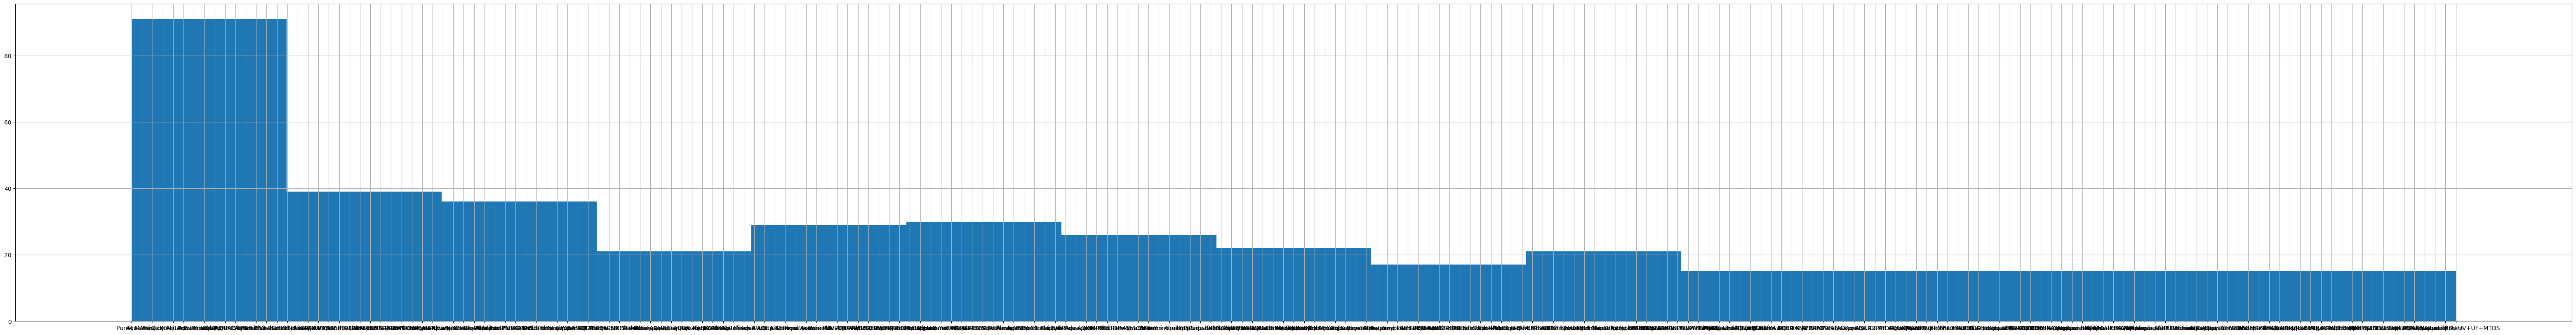

In [23]:
plt.figure(figsize=(80,10))
df4["ProductName"].hist(bins=15)

In [24]:
a=df4[df4['Rating']==4.8]


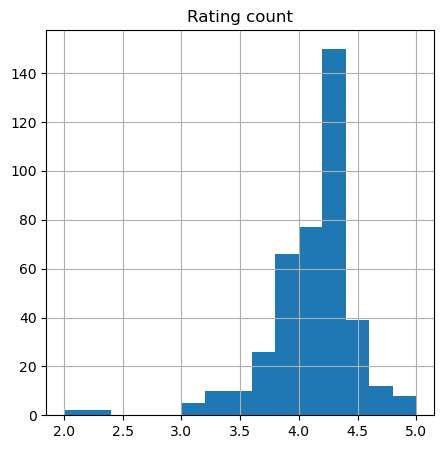

In [25]:
plt.figure(figsize=(5,5))
df4["Rating"].hist(bins=15)
plt.title('Rating count')
plt.show()

# Observations
- Rating from 4.2-4.4 more than 350 ratings are there which was highest

(array([284.,  81.,  37.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  279. ,  9251.1, 18223.2, 27195.3, 36167.4, 45139.5, 54111.6,
        63083.7, 72055.8, 81027.9, 90000. ]),
 <BarContainer object of 10 artists>)

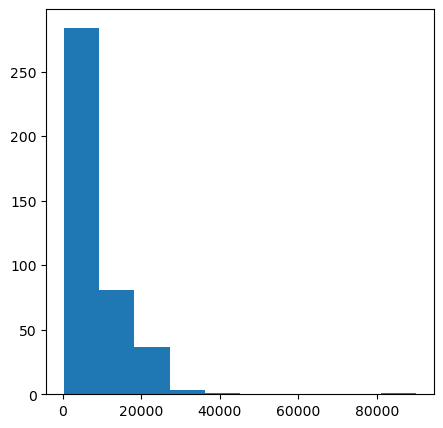

In [26]:
plt.figure(figsize=(5,5))
plt.hist(df4["Price(₹)"])

# Observations
- Price between 0-20,000/-Rs 700 purifiers are there which is highest.

# HIST+KDE(DIST)

### Numerical

C:\Users\user\AppData\Local\Temp\ipykernel_1132\1451180963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4["Rating"],kde=True,bins = [1.0,2.0,3.0,4.0,5.0,6.0])


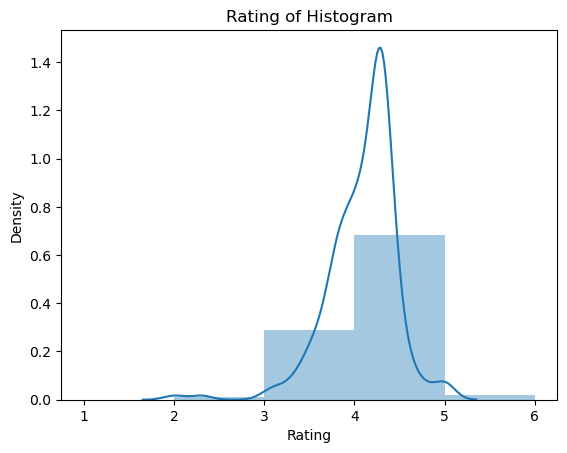

In [27]:
sns.distplot(df4["Rating"],kde=True,bins = [1.0,2.0,3.0,4.0,5.0,6.0])
plt.title('Rating of Histogram')
plt.show()

# Observations
- There was more than 1.75 probability for having rating range 4-4.5

C:\Users\user\AppData\Local\Temp\ipykernel_1132\3879398810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4["Rating"],kde=False,)


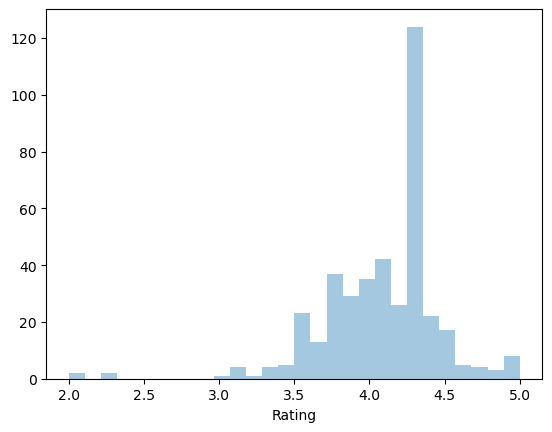

In [28]:
sns.distplot(df4["Rating"],kde=False,)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1132\2512562936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4["Original_cost(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])


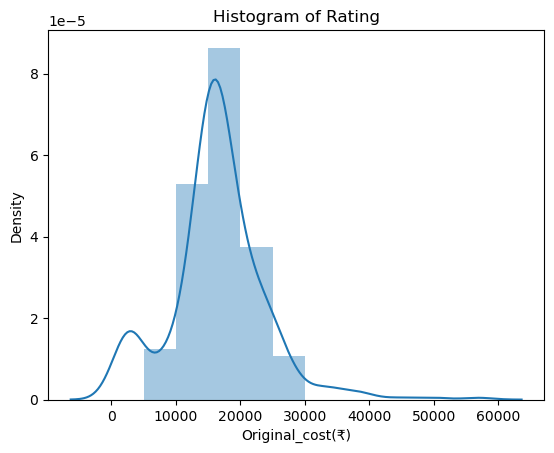

In [29]:
sns.distplot(df4["Original_cost(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])
plt.title('Histogram of Rating')
plt.show()

# Observations
- There was 6.7 probability for having original cost range 25,000/-Rs.

C:\Users\user\AppData\Local\Temp\ipykernel_1132\1804715620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4["Price(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])


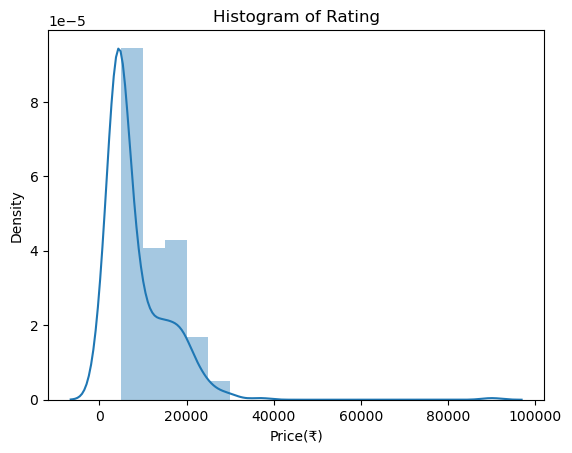

In [30]:
sns.distplot(df4["Price(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])
plt.title('Histogram of Rating')
plt.show()

# Observations
- There was 0.00008 probabi8lity for having price range 10,000/-Rs.

C:\Users\user\AppData\Local\Temp\ipykernel_1132\644590586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4["Original_cost(₹)"],kde=False,)


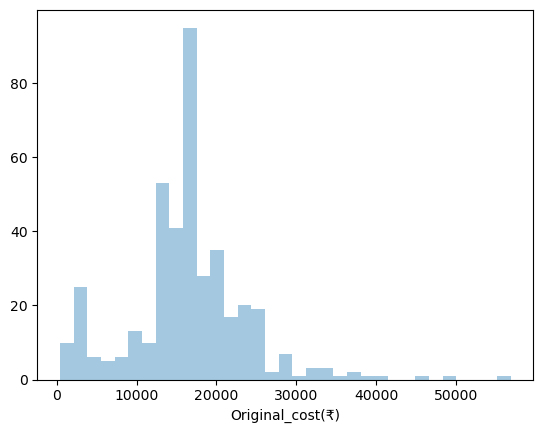

In [31]:
sns.distplot(df4["Original_cost(₹)"],kde=False,)
plt.show()

# Boxplot

### Numerical

In [32]:
c=df4[df4['Price(₹)']<20000]

<Axes: xlabel='Rating', ylabel='Price(₹)'>

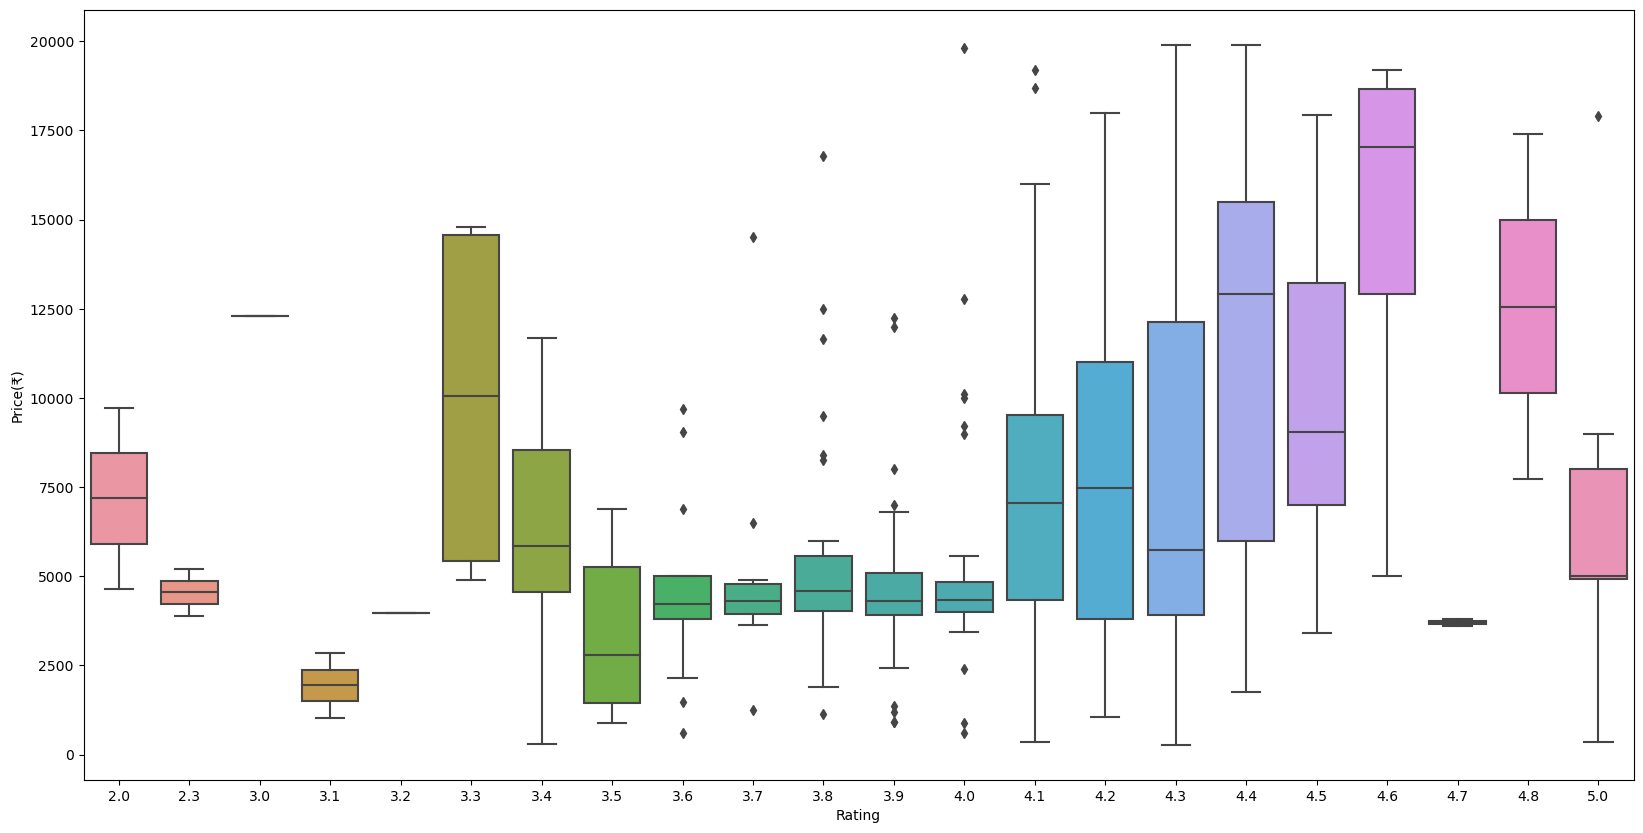

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Rating',y='Price(₹)',data=pd.DataFrame(c))

# Observations
- Ratings at 4.8 having more, in the price range betweeen 5000-17,400/-Rs.


# Violin Plot

### Numerical

<Axes: >

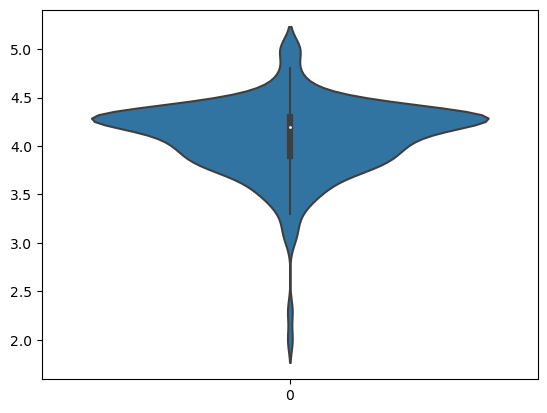

In [37]:
sns.violinplot(df4["Rating"])

<Axes: >

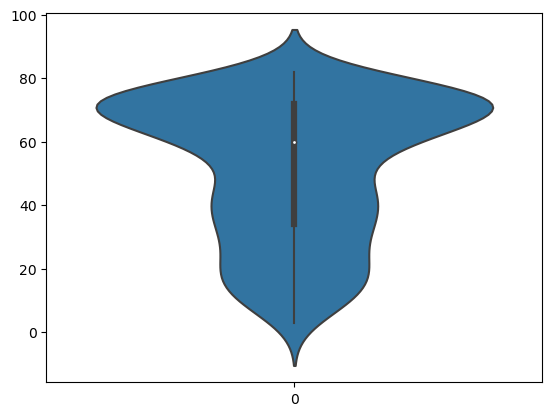

In [38]:
sns.violinplot(df4["Discount(%)"])

# Observations 
- At discount 70% there was more numbers of items.